# Capstone Project Part 4: Topic Modeling with LDA

**Author:** Soohyun Ahn <br>
    
**Date:** April 2023<br>
    
**Notebook Number:** 5/ 7

### Important Note:

This notebook contains interactive visualizations. To view them properly, please click **[here](https://nbviewer.org/github/treelunar/2023_Capstone/blob/main/Part_4_Topic_Modeling_with_LDA_movie_40000.ipynb)** The link will lead you to `Jupyter Notebook Viewer`.

In this notebook, we will explore topic modeling via `Latent Dirichlet Allocation` (LDA). LDA is an unsupervised learning algorithm, meaning it learns from the data without any explicit guidance or supervision. In LDA, the algorithm takes a corpus of text documents and learns a set of (hidden or latent) topics that best represent the corpus. The algorithm assumes that each document in the corpus is a mixture of these topics, and each word in the document is generated by one of the topics in the document's mixture. LDA works by assigning each word in the document to a topic and adjusting the assignments iteratively until it arrives at a stable topic distribution for each document. Once the model identifies the topics, it can classify new documents or analyze the distribution of topics across a corpus.

**Note**:
1) LDA does not take into account the order or context of words within a document.<br>
For a good introduction to LDA, see [A Beginner’s Guide to Latent Dirichlet Allocation(LDA)](https://towardsdatascience.com/latent-dirichlet-allocation-lda-9d1cd064ffa2).

2) More importantly, LDA requires that the number of topics be specified in advance. We haven't identified the optimal number of topics, so we will try different number of topics, which can be computationally expensive.

## Dataset Inspection & Preprocessing Continued

Let's import our dataset, take a look at it, and further process it (if needed).

In [4]:
# Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import gensim
import pyLDAvis.gensim_models

# hide warnings

import warnings
warnings.filterwarnings('ignore')

# Set the random seed

random.seed(42)
np.random.seed(42)

In [5]:
# Import dataset

ada_mpst_df = pd.read_csv("ada_embeddings_mpst_v3.csv")
ada_mpst_df.head()

,title,plot_synopsis,tags,split,synopsis_source,overview,num_tokens,ada_embeddings
0,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"['cult', ' horror', ' gothic', ' murder', ' at...",train,imdb,note synopsis orginal italian release segment ...,619,[ 0.00159859 -0.01722787 0.01489 ... 0.01...
1,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",['violence'],train,imdb,two thousand year ago nhagruul foul sorcerer r...,189,[-0.00052342 -0.00513257 0.01370719 ... -0.01...
2,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",['romantic'],test,imdb,gift store budapest workplace newly hi work co...,335,[-0.01208248 -0.01338249 0.0009446 ... -0.00...
3,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...","['inspiring', ' romantic', ' stupid', ' feel-g...",train,imdb,morning person anyone standard woken wife earl...,1074,[-0.00985113 0.00062676 0.00801298 ... -0.00...
4,Scarface,"In May 1980, a Cuban man named Tony Montana (A...","['cruelty', ' murder', ' dramatic', ' cult', '...",val,imdb,may cuban man named claim asylum florida usa s...,1366,[-0.0231264 -0.01031728 0.00604758 ... -0.00...


In [6]:
# Check null values
ada_mpst_df.isnull().value_counts()

title  plot_synopsis  tags   split  synopsis_source  overview  num_tokens  ada_embeddings
False  False          False  False  False            False     False       False             14177
dtype: int64

In [7]:
# Check the datasetm
ada_mpst_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14177 entries, 0 to 14176
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            14177 non-null  object
 1   plot_synopsis    14177 non-null  object
 2   tags             14177 non-null  object
 3   split            14177 non-null  object
 4   synopsis_source  14177 non-null  object
 5   overview         14177 non-null  object
 6   num_tokens       14177 non-null  int64 
 7   ada_embeddings   14177 non-null  object
dtypes: int64(1), object(7)
memory usage: 886.2+ KB


Let's create a wordcloud for the `overview` so that we can get the sense of the most frequent words across all the synopses.

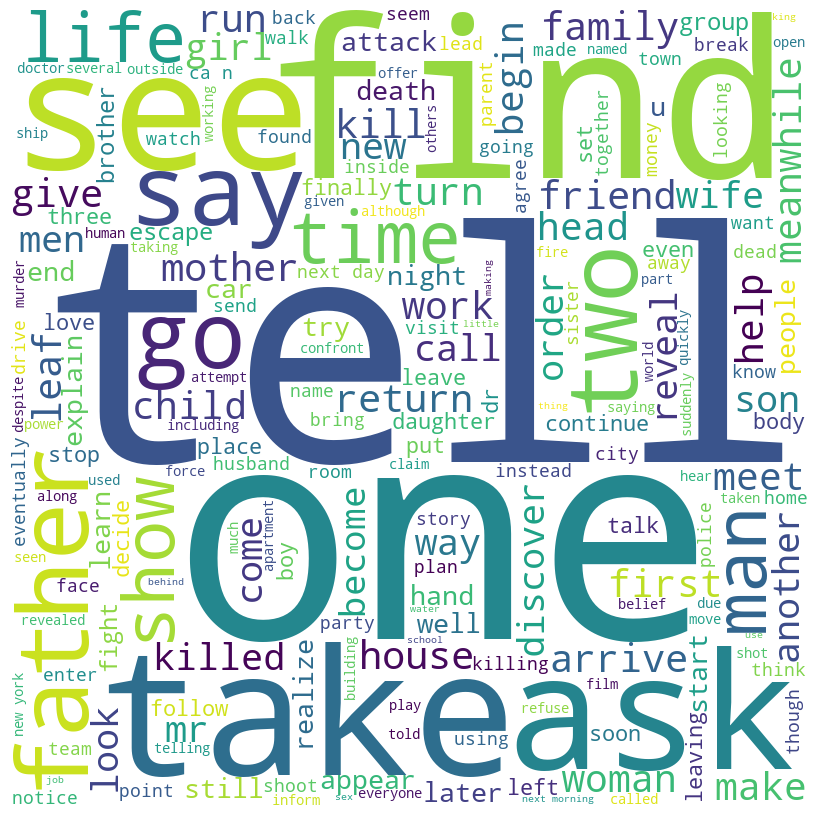

In [8]:
from wordcloud import WordCloud

# Concatenate the `overviews` into a single string
text = ' '.join(ada_mpst_df['overview'])

# Create a wordcloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)

# Plot the wordcloud
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Important (or common) words are larger in their font size. We can see that `tell`, `one`, `find`, `take`, `ask`, and `see` are frequent words.

## Topic Modeling with LDA

Now we can conduct topic modeling with LDA. It assigns topics to each synopsis document, where a topic is a distribution over words. We specify the number of topics as 10 and the number of passes through the corpus as 10. There are different methods of performing LDA. For our project,we will use `pyLDAvis`, which is a Python library that provides an interactive visualization of the topics extracted from the text. We can set the `num_topics` inbetween 10 and 16.

In [9]:
#pip install pyLDAvis
from IPython.core.display import HTML
from gensim import corpora, models

# Create dictionary and corpus
dictionary = corpora.Dictionary(ada_mpst_df['overview'].apply(lambda x: x.split()))
corpus = [dictionary.doc2bow(doc) for doc in ada_mpst_df['overview'].apply(lambda x: x.split())]

In [10]:
# Train LDA model
num_topics = 10
lda_model_10 = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10, random_state=42)

# Visualize the topics
pyLDAvis.enable_notebook()
viz10 = pyLDAvis.gensim_models.prepare(lda_model_10, corpus, dictionary)
pyLDAvis.display(viz10)

The PyLDAvis visualization disappears once the Jupyter notebookis closed or the computer is shut down.<br>We can save the PyLDAvis visualization as an HTML file using the `save_html()` function.

In [12]:
# Save the PyLDAvis visualization as an HTML file
#pyLDAvis.save_html(viz10, 'lda_viz_mpst_10.html')

PyLDAvis assigns topic numbers based on the size of the topic, with the largest topic being assigned the number 1, the second largest being assigned the number 2, and so on. Thus, potentially there can be mismatch between the topic numbers in the visual and the printed-out result. To prevent this mismatch, we can use `lda_model.show_topics()` that assigns topic numbers based on their order of appearance in the model output, with the first topic being assigned the number 0, the second topic being assigned the number 1, and so on.

In [13]:
# Print out top words for each topic in the order that matches the visual

num_topics = 10

for topic_idx, topic in lda_model_10.show_topics(formatted=False):
    viz10_topic_idx = viz10.topic_order.index(topic_idx+1)
    print(f'Top 10 Words for Topic #{viz10_topic_idx+1}:')
    top_words = [word[0] for word in topic]
    print(top_words[:10])

Top 10 Words for Topic #8:
['king', 'fight', 'battle', 'one', 'dragon', 'year', 'return', 'order', 'time', 'life']
Top 10 Words for Topic #6:
['find', 'dr', 'body', 'one', 'kill', 'man', 'back', 'zombie', 'book', 'begin']
Top 10 Words for Topic #7:
['men', 'soldier', 'war', 'german', 'army', 'american', 'officer', 'killed', 'one', 'british']
Top 10 Words for Topic #4:
['film', 'new', 'one', 'also', 'time', 'life', 'prison', 'drug', 'show', 'work']
Top 10 Words for Topic #10:
['el', 'marcello', 'carver', 'vallo', 'rocky', 'godfrey', 'de', 'elena', 'la', 'gideon']
Top 10 Words for Topic #2:
['tell', 'say', 'n', 'go', 'get', 'see', 'back', 'asks', 'one', 'come']
Top 10 Words for Topic #9:
['town', 'men', 'kill', 'take', 'village', 'gang', 'horse', 'father', 'killed', 'find']
Top 10 Words for Topic #1:
['father', 'love', 'mother', 'home', 'friend', 'family', 'life', 'go', 'day', 'one']
Top 10 Words for Topic #5:
['ship', 'find', 'crew', 'escape', 'take', 'back', 'alien', 'team', 'one', 'ea

Based on the LDA analysis results, we can infer the likely genres for each topic.<Br>While some genres are clearly distinguishable in a movie, many movies contain overlapping genres.<br>The LDA analysis suggests that classifying movies into 10 genres provides a reasonable approximation. 

| **Topic** |                                    **Top 10 Salient Words**                                   |              **Genres**             |
|:---------:|----------------------------------------------------------------------------------------------:|------------------------------------:|
| #1        | 'father', 'love', 'mother', 'home', 'friend', 'family', 'life', 'go', 'day', 'one'            | Drama, Family, Romance              |
| #2        | 'tell', 'say', 'n', 'go', 'get', 'see', 'back', 'asks', 'one', 'come'                         | any genres...                       |
| #3        | 'police', 'car', 'find', 'kill', 'go', 'house', 'get', 'tell', 'man', 'one'                   | Action, Thriller, Crime             |
| #4        | 'film', 'new', 'one', 'also', 'time', 'life', 'prison', 'drug', 'show', 'work'                | Action, Adventure, War              |
| #5        | 'ship', 'find', 'crew', 'escape', 'take', 'back', 'alien', 'team', 'one', 'earth'             | Mystery, Sci-fi, Horror, Adventure  |
| #6        | 'find', 'dr', 'body', 'one', 'kill', 'man', 'back', 'zombie', 'book', 'begin'                 | Mystery, Sci-fi, Horror, Adventure  |
| #7        | 'men', 'soldier', 'war', 'german', 'army', 'american', 'officer', 'killed', 'one', 'british'  | War, History                        |
| #8        | 'king', 'fight', 'battle', 'one', 'dragon', 'year', 'return', 'order', 'time', 'life'         | Fantasy, History, Adventure         |
| #9        | 'town', 'men', 'kill', 'take', 'village', 'gang', 'horse', 'father', 'killed', 'find'         | Action, Mystery, Horror, Adventure  |
| #10       | 'el', 'marcello', 'carver', 'vallo', 'rocky', 'godfrey', 'de', 'elena', 'la', 'gideon'        | Drama, Documentary, History         |
    
Again, matching genres is very subjective.

Let's run the next model with `num_topics = 12`.

In [14]:
# Train LDA model
num_topics = 12
lda_model_12 = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10, random_state=42)

# Visualize the topics
pyLDAvis.enable_notebook()
viz12 = pyLDAvis.gensim_models.prepare(lda_model_12, corpus, dictionary)
pyLDAvis.display(viz12)

In [15]:
# Save the PyLDAvis visualization as an HTML file
#pyLDAvis.save_html(viz12, 'lda_viz_mpst_12.html')

In [16]:
# Print out top words for each topic in the order that matches the visual

num_topics = 12

for topic_idx in range(num_topics):
    topic = lda_model_12.show_topic(topic_idx)
    viz12_topic_idx = viz12.topic_order.index(topic_idx + 1)
    print(f'Top 10 Words for Topic #{viz12_topic_idx + 1}:')
    top_words = [word[0] for word in topic]
    print(top_words[:10])

Top 10 Words for Topic #8:
['king', 'sir', 'father', 'son', 'death', 'one', 'return', 'love', 'take', 'village']
Top 10 Words for Topic #6:
['find', 'dr', 'power', 'world', 'human', 'one', 'kill', 'body', 'help', 'time']
Top 10 Words for Topic #7:
['men', 'war', 'soldier', 'german', 'officer', 'army', 'agent', 'killed', 'american', 'force']
Top 10 Words for Topic #4:
['film', 'life', 'one', 'new', 'also', 'time', 'end', 'prison', 'wife', 'first']
Top 10 Words for Topic #11:
['marcello', 'jake', 'carver', 'fight', 'nicky', 'sequence', 'round', 'fisher', 'gideon', 'bomb']
Top 10 Words for Topic #1:
['tell', 'get', 'say', 'n', 'go', 'see', 'back', 'asks', 'one', 'take']
Top 10 Words for Topic #9:
['town', 'kill', 'find', 'men', 'killed', 'horse', 'man', 'back', 'sheriff', 'take']
Top 10 Words for Topic #2:
['father', 'love', 'mother', 'home', 'friend', 'go', 'family', 'life', 'day', 'tell']
Top 10 Words for Topic #5:
['ship', 'find', 'crew', 'escape', 'back', 'take', 'alien', 'one', 'grou

Again, it is difficult to determine specific movie genres based on these words. But we can try..

| **Topic** | **Top 10 Salient Words**                                                                                | **Genres**                   |
|:---------:|---------------------------------------------------------------------------------------------------------|------------------------------|
| #1        | 'tell', 'get', 'say', 'n', 'go', 'see', 'back', 'asks', 'one', 'take'                                   | any genres...                |
| #2        | 'father', 'love', 'mother', 'home', 'friend', 'go', 'family', 'life', 'day', 'tell'                     | Drama, Family, Romance       |
| #3        | 'police', 'find', 'car', 'kill', 'house', 'go', 'get', 'tell', 'man', 'one'                             | Action, Mystery, Crime       |
| #4        | 'film', 'life', 'one', 'new', 'also', 'time', 'end', 'prison', 'wife', 'first'                          | Documentary, Action          |
| #5        | 'ship', 'find', 'crew', 'escape', 'back', 'take', 'alien', 'one', 'group', 'earth'                      | Sci-fi, Mystery, Horror, Adventure                |
| #6        | 'find', 'dr', 'power', 'world', 'human', 'one', 'kill', 'body', 'help', 'time'                          | Thriller, Mystery, Horror    |
| #7        | 'men', 'war', 'soldier', 'german', 'officer', 'army', 'agent', 'killed', 'american', 'force'            | War, History                 |
| #8        | 'king', 'sir', 'father', 'son', 'death', 'one', 'return', 'love', 'take', 'village'                     | Adventure, Drama, Romance, History      |
| #9        | 'town', 'kill', 'find', 'men', 'killed', 'horse', 'man', 'back', 'sheriff', 'take'                      | Action, Adventure, History   |
| #10       | 'kishen', 'karan', 'duke', 'curtis', 'child', 'princess', 'stephen', 'fairy', 'castle', 'ursula'        | Fantasy, Adventure           |
| #11       | 'marcello', 'jake', 'carver', 'fight', 'nicky', 'sequence', 'round', 'fisher', 'gideon', 'bomb'         | History, Fantasy, Drama      |
| #12       | 'c', 'el', 'e', 'vallo', 'l', 'h', 'rocky', 'la', 'de', 'le'                                            | ??                           |

Topic #12 doesn't look great since it contains lots of single letters and very short strings, which may not hold much meaningful information.
In one of our previous notebooks, **Part_1_Data_Preprocessing_MPST.ipynb**, we preprocessed text data.<br>
We removed people names, non-alphabetical terms, lowercasing, removing stopwords, and so on.<br>The process might have been incomplete.

In [17]:
# Train LDA model
num_topics = 14
lda_model_14 = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10, random_state=42)

# Visualize the topics
pyLDAvis.enable_notebook()
viz14 = pyLDAvis.gensim_models.prepare(lda_model_14, corpus, dictionary)
pyLDAvis.display(viz14)

In [18]:
# Save the PyLDAvis visualization as an HTML file
#pyLDAvis.save_html(viz14, 'lda_viz_mpst_14.html')

In [19]:
# Print out top words for each topic in the order that matches the visual

num_topics = 14

for topic_idx in range(num_topics):
    topic = lda_model_14.show_topic(topic_idx)
    viz14_topic_idx = viz14.topic_order.index(topic_idx + 1)
    print(f'Top 10 Words for Topic #{viz14_topic_idx + 1}:')
    top_words = [word[0] for word in topic]
    print(top_words[:10])

Top 10 Words for Topic #6:
['king', 'one', 'return', 'battle', 'power', 'world', 'year', 'take', 'life', 'time']
Top 10 Words for Topic #7:
['body', 'dr', 'find', 'man', 'house', 'zombie', 'one', 'back', 'room', 'dead']
Top 10 Words for Topic #11:
['fight', 'team', 'gang', 'game', 'c', 'one', 'w', 'man', 'family', 'win']
Top 10 Words for Topic #4:
['film', 'one', 'new', 'life', 'also', 'time', 'end', 'first', 'show', 'story']
Top 10 Words for Topic #12:
['money', 'bank', 'get', 'plan', 'escape', 'marcello', 'police', 'gang', 'robbery', 'duke']
Top 10 Words for Topic #10:
['cat', 'get', 'dog', 'red', 'cecil', 'head', 'back', 'fall', 'end', 'show']
Top 10 Words for Topic #9:
['town', 'men', 'kill', 'village', 'horse', 'sheriff', 'take', 'vampire', 'man', 'killed']
Top 10 Words for Topic #2:
['love', 'father', 'mother', 'home', 'friend', 'go', 'family', 'life', 'tell', 'day']
Top 10 Words for Topic #5:
['ship', 'find', 'crew', 'escape', 'take', 'back', 'alien', 'earth', 'city', 'team']
To

| **Topic** | **Top 10 Salient Words**                                                                                | **Genres**                   |
|:---------:|---------------------------------------------------------------------------------------------------------|------------------------------|
| #1        | 'tell', 'go', 'get', 'say', 'n', 'see', 'back', 'asks', 'one', 'room'                                   | any genres...                |
| #2        | 'love', 'father', 'mother', 'home', 'friend', 'go', 'family', 'life', 'tell', 'day'                     | Drama, Family, Romance       |
| #3        | 'police', 'kill', 'find', 'car', 'killed', 'murder', 'house', 'go', 'get', 'take'                       | Action, Mystery, Crime       | 
| #4        | 'film', 'one', 'new', 'life', 'also', 'time', 'end', 'first', 'show', 'story'                           | Documentary, Action          |
| #5        | 'ship', 'find', 'crew', 'escape', 'take', 'back', 'alien', 'earth', 'city', 'team'                      | Sci-fi, Horror, Adventure    |
| #6        | 'king', 'one', 'return', 'battle', 'power', 'world', 'year', 'take', 'life', 'time'                     | Fantasy, Adventure, History  |
| #7        | 'body', 'dr', 'find', 'man', 'house', 'zombie', 'one', 'back', 'room', 'dead'                           | Fantasy, Sci-fi, Horror      |
| #8        | 'soldier', 'war', 'german', 'men', 'agent', 'army', 'officer', 'british', 'american', 'killed'          | Adventure, Drama, History    |
| #9        | 'town', 'men', 'kill', 'village', 'horse', 'sheriff', 'take', 'vampire', 'man', 'killed'                | Action, Adventure, History   |
| #10       | 'cat', 'get', 'dog', 'red', 'cecil', 'head', 'back', 'fall', 'end', 'show'                              | Fantasy, Adventure           |
| #11       | 'fight', 'team', 'gang', 'game', 'c', 'one', 'w', 'man', 'family', 'win'                                | Action, Crime                |
| #12       | 'money', 'bank', 'get', 'plan', 'escape', 'marcello', 'police', 'gang', 'robbery', 'duke'               | Action, Crime, Adventure     |
| #13       | 'el', 'x', 'e', 'l', 'logan', 'rocky', 'de', 'wolverine', 'h', 'la'                                     | Sci-fi, Fantasy, Drama       |
| #14       | 'karan', 'curtis', 'bart', 'stephen', 'vivian', 'ursula', 'sara', 'julian', 'stanley', 'lincoln         | Fantasy, Adventure, History  |

We have seen three LDA models so far. Some topics consistently appear in all three models.

In [23]:
# Train LDA model
num_topics = 16
lda_model_16 = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10, random_state=42)

# Visualize the topics
pyLDAvis.enable_notebook()
viz16 = pyLDAvis.gensim_models.prepare(lda_model_16, corpus, dictionary)
pyLDAvis.display(viz16)

In [24]:
# Save the PyLDAvis visualization as an HTML file
#pyLDAvis.save_html(viz16, 'lda_viz_mpst_16.html')

In [25]:
# Print out top words for each topic in the order that matches the visual

num_topics = 16

for topic_idx in range(num_topics):
    topic = lda_model_16.show_topic(topic_idx)
    viz16_topic_idx = viz16.topic_order.index(topic_idx + 1)
    print(f'Top 10 Words for Topic #{viz16_topic_idx + 1}:')
    top_words = [word[0] for word in topic]
    print(top_words[:10])

Top 10 Words for Topic #8:
['king', 'one', 'father', 'return', 'son', 'two', 'battle', 'take', 'dragon', 'life']
Top 10 Words for Topic #9:
['find', 'dr', 'kill', 'body', 'man', 'zombie', 'one', 'power', 'back', 'monster']
Top 10 Words for Topic #13:
['game', 'fight', 'team', 'player', 'one', 'win', 'defeat', 'batman', 'victoria', 'master']
Top 10 Words for Topic #4:
['film', 'one', 'new', 'life', 'time', 'also', 'first', 'show', 'end', 'work']
Top 10 Words for Topic #7:
['money', 'kill', 'gang', 'take', 'men', 'get', 'town', 'shoot', 'escape', 'gun']
Top 10 Words for Topic #11:
['get', 'song', 'show', 'cat', 'band', 'end', 'cecil', 'dog', 'red', 'head']
Top 10 Words for Topic #14:
['vampire', 'count', 'village', 'priest', 'church', 'castle', 'villager', 'werewolf', 'ichi', 'vivian']
Top 10 Words for Topic #1:
['father', 'love', 'mother', 'family', 'home', 'friend', 'go', 'life', 'day', 'tell']
Top 10 Words for Topic #6:
['find', 'ship', 'crew', 'group', 'back', 'escape', 'boat', 'isla

| **Topic** | **Top 10 Salient Words**                                                                                | **Genres**                   |
|:---------:|---------------------------------------------------------------------------------------------------------|------------------------------|
| #1        | 'father', 'love', 'mother', 'family', 'home', 'friend', 'go', 'life', 'day', 'tell'                     | Drama, Family, Romance       |
| #2        | 'tell', 'say', 'see', 'back', 'n', 'go', 'asks', 'get', 'one', 'room'                                   | any genres...                |
| #3        | 'get', 'car', 'tell', 'go', 'back', 'find', 'n', 'see', 'take', 'call'                                  | any genres...                | 
| #4        | 'film', 'one', 'new', 'life', 'also', 'time', 'end', 'first', 'show', 'story'                           | Documentary, Action          |
| #5        | 'police', 'find', 'house', 'murder', 'kill', 'death', 'killed', 'body', 'car', 'later'                  | Mystery, Horror, Action, Crime    |
| #6        | 'find', 'ship', 'crew', 'group', 'back', 'escape', 'boat', 'island', 'water', 'two'                     | Sci-fi, Adventure, Fantasy   |
| #7        | 'money', 'kill', 'gang', 'take', 'men', 'get', 'town', 'shoot', 'escape', 'gun'                         | Action, Crime                |
| #8        | 'king', 'one', 'father', 'return', 'son', 'two', 'battle', 'take', 'dragon', 'life'                     | Adventure, Drama, History    |
| #9        | 'find', 'dr', 'kill', 'body', 'man', 'zombie', 'one', 'power', 'back', 'monster'                        | Sci-fi, Fantasy, Horror      |
| #10       | 'soldier', 'war', 'german', 'men', 'army', 'officer', 'american', 'agent', 'british', 'killed'          | War, History                 |
| #11       | 'get', 'song', 'show', 'cat', 'band', 'end', 'cecil', 'dog', 'red', 'head'                              | Musical, Fantasy, Adventure  |
| #12       | 'earth', 'alien', 'c', 'planet', 'robot', 'x', 'space', 'weapon', 'human', 'w'                          | Sci-fi, Adventure            |
| #13       | 'game', 'fight', 'team', 'player', 'one', 'win', 'defeat', 'batman', 'victoria', 'master'               | Fantasy, Adventure, Action   |
| #14       | 'vampire', 'count', 'village', 'priest', 'church', 'castle', 'villager', 'werewolf', 'ichi', 'vivian'   | Fantasy, Horror, Adventure   |
| #15       | 'karan', 'duke', 'curtis', 'stephen', 'ursula', 'child', 'julian', 'princess', 'vera', 'gold'           | Fantasy, Adventure, Histor   |
| #16       | 'nicky', 'heather', 'pluto', 'jessica', 'marcus', 'walker', 'hugo', 'benji', 'square', 'terminator'     | Sci-fi, Adventure, Fantasy   |

Again, the genre allocation is very subjective. However, LDA model with 16 topics look slightly better than other models. 

Based on our 4 LDA models we can observe that some genres (e.g., comedy) are harder to identify over others (e.g., Sci-fi and War). 

### Topic Probability Analysis

Topic probability analysis is a crucial step in understanding the topics in a collection of documents. It allows us to determine the degree to which each document belongs to a particular topic, providing insights into the underlying themes present in the corpus. By analyzing the topic probabilities for each document, we can identify patterns, trends, and relationships within the data. Topic probability analysis is commonly used for creating recommendation systems and content analysis.

In [31]:
num_topics=16

# Create an empty DataFrame to store topic probabilities for each document
df_topic_prob = pd.DataFrame(columns=['topic'+str(i+1) for i in range(num_topics)])

# Iterate over each document in the corpus and calculate topic probabilities
for i, doc in enumerate(corpus):
    topic_probabilities = lda_model_16.get_document_topics(doc, minimum_probability=0)
    topic_probabilities = [probability for _, probability in topic_probabilities]
    df_topic_prob.loc[i] = topic_probabilities

# Print the top 10 topic probabilities for the fifth document
# We already know it is "Scarface"
print(df_topic_prob.iloc[4].nlargest(10))

topic5     0.290547
topic4     0.211818
topic8     0.117246
topic13    0.099494
topic10    0.095485
topic14    0.079608
topic15    0.064719
topic9     0.025956
topic2     0.014802
topic1     0.000047
Name: 4, dtype: float32


In [32]:
# Find out the fifth document
ada_mpst_df.iloc[4]

title                                                       Scarface
plot_synopsis      In May 1980, a Cuban man named Tony Montana (A...
tags               ['cruelty', ' murder', ' dramatic', ' cult', '...
split                                                            val
synopsis_source                                                 imdb
overview           may cuban man named claim asylum florida usa s...
num_tokens                                                      1366
ada_embeddings     [-0.0231264  -0.01031728  0.00604758 ... -0.00...
topic_0                                                     0.000047
topic_1                                                     0.014808
topic_2                                                     0.000047
topic_3                                                     0.211811
topic_4                                                     0.290541
topic_5                                                     0.000047
topic_6                           

The top 5 genres associated with the movie [**Scarface**](https://www.imdb.com/title/tt0086250/?ref_=nv_sr_srsg_0) are:

| **Topic** | **Top 10 Salient Words**                                                                                | **Genres**                   |
|:---------:|---------------------------------------------------------------------------------------------------------|------------------------------|
| #5        | 'police', 'find', 'house', 'murder', 'kill', 'death', 'killed', 'body', 'car', 'later'                  | Mystery, Horror, Action, Crime    |
| #4        | 'film', 'one', 'new', 'life', 'also', 'time', 'end', 'first', 'show', 'story'                           | Documentary, Action          |
| #8        | 'king', 'one', 'father', 'return', 'son', 'two', 'battle', 'take', 'dragon', 'life'                     | Adventure, Drama, History    |
| #13       | 'game', 'fight', 'team', 'player', 'one', 'win', 'defeat', 'batman', 'victoria', 'master'               | Fantasy, Adventure, Action   |
| #10       | 'soldier', 'war', 'german', 'men', 'army', 'officer', 'american', 'agent', 'british', 'killed'          | War, History                 |

Let's examine its synopsis to see whether our model worked well.

In [33]:
# The overview of "Scarface"
ada_mpst_df.iloc[4]['plot_synopsis']

'In May 1980, a Cuban man named Tony Montana (Al Pacino) claims asylum, in Florida, USA, and is in search of the "American Dream" after departing Cuba in the Mariel boatlift of 1980. When questioned by three tough-talking INS officials, they notice a tattoo on Tony\'s left arm of a black heart with a pitchfork through it, which identifies him as a hitman, and detain him in a camp called \'Freedomtown\' with other Cubans, including Tony\'s best friend and former Cuban Army buddy Manolo "Manny Ray" Ribiera (Steven Bauer), under the local I-95 expressway while the government evaluates their visa petitions.After 30 days of governmental dithering and camp rumors, Manny receives an offer from the Cuban Mafia which he quickly relays to Tony. If they kill Emilio Rebenga (Roberto Contreras) a former aide to Fidel Castro who is now detained in Freedomtown, they will receive green cards. Tony agrees, and kills Rebenga during a riot at Freedomtown. The murder of Rebenga was requested by Frank Lópe

We can say the model was pretty sensible in this case.<br>Now we can apply the `lda_model_16` to the `overview` column of the `ada_mpst_df` to get topic probabilities for all the movies.

In [26]:
# Define the function
def get_topic_probabilities(doc, lda_model, dictionary):
    bow = dictionary.doc2bow(doc.split())
    topic_probabilities = lda_model.get_document_topics(bow, minimum_probability=0)
    topic_probabilities = [probability for _, probability in topic_probabilities]
    return topic_probabilities

# Apply the function to the `overview` column
print("Applying function to documents...")
topics_df = ada_mpst_df['overview'].apply(get_topic_probabilities, lda_model=lda_model_16, dictionary=dictionary)
print("Done applying function to documents.")

# Create a new dataframe with the topic probabilities for each movie
topics_df = pd.DataFrame(list(topics_df))

# Add the topic columns to the movie dataframe
for i in range(16):
    col_name = f"topic_{i}"
    ada_mpst_df[col_name] = topics_df[i]

Applying function to documents...
Done applying function to documents.


### Topic Probability Analysis with k-Means Clustering

Now we can use K-means again with topic probabilities.<Br>
It provide a more focused and specific representation of the movies, as they capture the most relevant topics of each movie, while the bag of words representation may include many irrelevant or redundant words.

In [36]:
from sklearn.cluster import KMeans

# Convert the topic probabilities to a 2D numpy array
topic_prob_array = np.vstack(topics_df.to_numpy(dtype=list))

# Choose the number of clusters
k = 5

# Initialize the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to the topic probabilities
kmeans.fit(topic_prob_array)

# Get the cluster labels
labels = kmeans.labels_

# Add the cluster labels to the movie dataframe
ada_mpst_df['cluster'] = labels

# Check the result
ada_mpst_df.head()

,title,plot_synopsis,tags,split,synopsis_source,overview,num_tokens,ada_embeddings,topic_0,topic_1,...,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,cluster
0,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"['cult', ' horror', ' gothic', ' murder', ' at...",train,imdb,note synopsis orginal italian release segment ...,619,[ 0.00159859 -0.01722787 0.01489 ... 0.01...,0.004239,0.074382,...,0.136618,0.011946,0.290857,0.000106,0.000106,0.025787,0.000106,0.248278,0.000106,4
1,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",['violence'],train,imdb,two thousand year ago nhagruul foul sorcerer r...,189,[-0.00052342 -0.00513257 0.01370719 ... -0.01...,0.646998,0.348174,...,0.000345,0.000345,0.000345,0.000345,0.000345,0.000345,0.000345,0.000345,0.000345,0
2,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",['romantic'],test,imdb,gift store budapest workplace newly hi work co...,335,[-0.01208248 -0.01338249 0.0009446 ... -0.00...,0.000189,0.000189,...,0.509283,0.000189,0.056843,0.000189,0.000189,0.221163,0.000189,0.081029,0.000189,2
3,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...","['inspiring', ' romantic', ' stupid', ' feel-g...",train,imdb,morning person anyone standard woken wife earl...,1074,[-0.00985113 0.00062676 0.00801298 ... -0.00...,0.000059,0.000059,...,0.521396,0.000059,0.000059,0.000059,0.000059,0.079998,0.000059,0.075571,0.000059,2
4,Scarface,"In May 1980, a Cuban man named Tony Montana (A...","['cruelty', ' murder', ' dramatic', ' cult', '...",val,imdb,may cuban man named claim asylum florida usa s...,1366,[-0.0231264 -0.01031728 0.00604758 ... -0.00...,0.000047,0.014808,...,0.117259,0.025959,0.095475,0.000047,0.000047,0.099545,0.079607,0.064669,0.000047,1


Text(0, 0.5, 'Number of Movies')

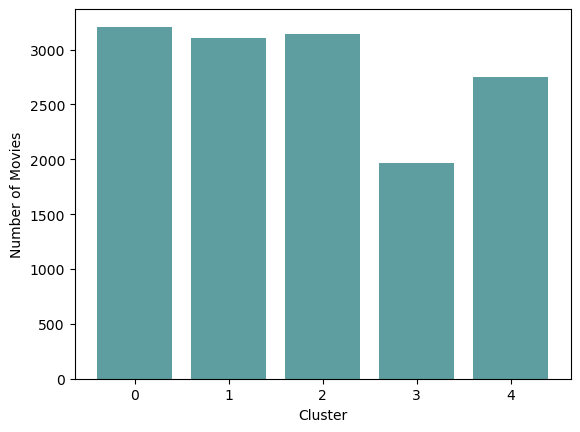

In [37]:
# Create a bar plot

cluster_counts = ada_mpst_df['cluster'].value_counts()
plt.bar(cluster_counts.index, cluster_counts.values, color = 'cadetblue')
plt.xlabel("Cluster")
plt.ylabel("Number of Movies")

We have assigned the number of clusters to 5 arbitrarily. However, we can examine which movies belong to which group and use our domain knowledge to determine whether the clustering makes sense or not. This approach allows us to leverage our understanding of the movie genres and topics to further refine the clustering process.

We can use the elbow method to find the optimal value for clusters.

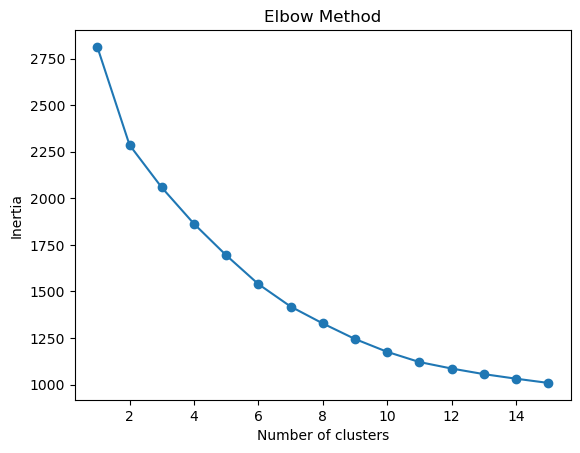

In [41]:
from sklearn.cluster import KMeans

inertias = []
cluster_range = range(1, 16)

for i in cluster_range:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(topic_prob_array)
    inertias.append(kmeans.inertia_)

plt.plot(cluster_range, inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

The plot shows a smooth curve without clear optimal points.<br>Then, we can try a density-based clustering algorithms like DBSCAN (Density-Based Spatial Clustering of Applications with Noise). It can automatically identify the optimal number of clusters based on the density of the data points.

- `eps` is the maximum distance between two samples to be considered as in the same neighborhood, and
- `min_samples` is the minimum number of samples required to form a dense region.

In [55]:
from sklearn.cluster import DBSCAN

# Initialize the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the model to the topic probabilities
dbscan.fit(topic_prob_array)

# Get the cluster labels
labels = dbscan.labels_

# Add the cluster labels to the movie dataframe
ada_mpst_df['cluster'] = labels

# Print the number of unique clusters (excluding noise)
print(f"Number of unique clusters: {len(set(labels)) - (1 if -1 in labels else 0)}")

# Display the first few rows of the updated dataframe
ada_mpst_df.head()

Number of unique clusters: 1


,title,plot_synopsis,tags,split,synopsis_source,overview,num_tokens,ada_embeddings,topic_0,topic_1,...,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,cluster
0,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"['cult', ' horror', ' gothic', ' murder', ' at...",train,imdb,note synopsis orginal italian release segment ...,619,[ 0.00159859 -0.01722787 0.01489 ... 0.01...,0.004239,0.074382,...,0.136618,0.011946,0.290857,0.000106,0.000106,0.025787,0.000106,0.248278,0.000106,0
1,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",['violence'],train,imdb,two thousand year ago nhagruul foul sorcerer r...,189,[-0.00052342 -0.00513257 0.01370719 ... -0.01...,0.646998,0.348174,...,0.000345,0.000345,0.000345,0.000345,0.000345,0.000345,0.000345,0.000345,0.000345,0
2,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",['romantic'],test,imdb,gift store budapest workplace newly hi work co...,335,[-0.01208248 -0.01338249 0.0009446 ... -0.00...,0.000189,0.000189,...,0.509283,0.000189,0.056843,0.000189,0.000189,0.221163,0.000189,0.081029,0.000189,0
3,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...","['inspiring', ' romantic', ' stupid', ' feel-g...",train,imdb,morning person anyone standard woken wife earl...,1074,[-0.00985113 0.00062676 0.00801298 ... -0.00...,0.000059,0.000059,...,0.521396,0.000059,0.000059,0.000059,0.000059,0.079998,0.000059,0.075571,0.000059,0
4,Scarface,"In May 1980, a Cuban man named Tony Montana (A...","['cruelty', ' murder', ' dramatic', ' cult', '...",val,imdb,may cuban man named claim asylum florida usa s...,1366,[-0.0231264 -0.01031728 0.00604758 ... -0.00...,0.000047,0.014808,...,0.117259,0.025959,0.095475,0.000047,0.000047,0.099545,0.079607,0.064669,0.000047,0


We can manually adjust the `eps` and `min_samples` and see the resulting clusters.

In [46]:
# Initialize the DBSCAN model
dbscan = DBSCAN(eps=0.3, min_samples=10)

# Fit the model to the topic probabilities
dbscan.fit(topic_prob_array)

# Get the cluster labels
labels = dbscan.labels_

# Add the cluster labels to the movie dataframe
ada_mpst_df['cluster'] = labels

# Print the number of unique clusters (excluding noise)
print(f"Number of unique clusters: {len(set(labels)) - (1 if -1 in labels else 0)}")

# Display the first few rows of the updated dataframe
ada_mpst_df.head()

Number of unique clusters: 2


,title,plot_synopsis,tags,split,synopsis_source,overview,num_tokens,ada_embeddings,topic_0,topic_1,...,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,cluster
0,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"['cult', ' horror', ' gothic', ' murder', ' at...",train,imdb,note synopsis orginal italian release segment ...,619,[ 0.00159859 -0.01722787 0.01489 ... 0.01...,0.004239,0.074382,...,0.136618,0.011946,0.290857,0.000106,0.000106,0.025787,0.000106,0.248278,0.000106,0
1,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",['violence'],train,imdb,two thousand year ago nhagruul foul sorcerer r...,189,[-0.00052342 -0.00513257 0.01370719 ... -0.01...,0.646998,0.348174,...,0.000345,0.000345,0.000345,0.000345,0.000345,0.000345,0.000345,0.000345,0.000345,0
2,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",['romantic'],test,imdb,gift store budapest workplace newly hi work co...,335,[-0.01208248 -0.01338249 0.0009446 ... -0.00...,0.000189,0.000189,...,0.509283,0.000189,0.056843,0.000189,0.000189,0.221163,0.000189,0.081029,0.000189,0
3,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...","['inspiring', ' romantic', ' stupid', ' feel-g...",train,imdb,morning person anyone standard woken wife earl...,1074,[-0.00985113 0.00062676 0.00801298 ... -0.00...,0.000059,0.000059,...,0.521396,0.000059,0.000059,0.000059,0.000059,0.079998,0.000059,0.075571,0.000059,0
4,Scarface,"In May 1980, a Cuban man named Tony Montana (A...","['cruelty', ' murder', ' dramatic', ' cult', '...",val,imdb,may cuban man named claim asylum florida usa s...,1366,[-0.0231264 -0.01031728 0.00604758 ... -0.00...,0.000047,0.014808,...,0.117259,0.025959,0.095475,0.000047,0.000047,0.099545,0.079607,0.064669,0.000047,0


In [48]:
# Initialize the DBSCAN model
dbscan = DBSCAN(eps=0.7, min_samples=10)

# Fit the model to the topic probabilities
dbscan.fit(topic_prob_array)

# Get the cluster labels
labels = dbscan.labels_

# Add the cluster labels to the movie dataframe
ada_mpst_df['cluster'] = labels

# Print the number of unique clusters (excluding noise)
print(f"Number of unique clusters: {len(set(labels)) - (1 if -1 in labels else 0)}")

# Display the first few rows of the updated dataframe
ada_mpst_df.head()

Number of unique clusters: 1


,title,plot_synopsis,tags,split,synopsis_source,overview,num_tokens,ada_embeddings,topic_0,topic_1,...,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,cluster
0,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"['cult', ' horror', ' gothic', ' murder', ' at...",train,imdb,note synopsis orginal italian release segment ...,619,[ 0.00159859 -0.01722787 0.01489 ... 0.01...,0.004239,0.074382,...,0.136618,0.011946,0.290857,0.000106,0.000106,0.025787,0.000106,0.248278,0.000106,0
1,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",['violence'],train,imdb,two thousand year ago nhagruul foul sorcerer r...,189,[-0.00052342 -0.00513257 0.01370719 ... -0.01...,0.646998,0.348174,...,0.000345,0.000345,0.000345,0.000345,0.000345,0.000345,0.000345,0.000345,0.000345,0
2,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",['romantic'],test,imdb,gift store budapest workplace newly hi work co...,335,[-0.01208248 -0.01338249 0.0009446 ... -0.00...,0.000189,0.000189,...,0.509283,0.000189,0.056843,0.000189,0.000189,0.221163,0.000189,0.081029,0.000189,0
3,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...","['inspiring', ' romantic', ' stupid', ' feel-g...",train,imdb,morning person anyone standard woken wife earl...,1074,[-0.00985113 0.00062676 0.00801298 ... -0.00...,0.000059,0.000059,...,0.521396,0.000059,0.000059,0.000059,0.000059,0.079998,0.000059,0.075571,0.000059,0
4,Scarface,"In May 1980, a Cuban man named Tony Montana (A...","['cruelty', ' murder', ' dramatic', ' cult', '...",val,imdb,may cuban man named claim asylum florida usa s...,1366,[-0.0231264 -0.01031728 0.00604758 ... -0.00...,0.000047,0.014808,...,0.117259,0.025959,0.095475,0.000047,0.000047,0.099545,0.079607,0.064669,0.000047,0


In [57]:
# Initialize the DBSCAN model
dbscan = DBSCAN(eps=0.1, min_samples=10)

# Fit the model to the topic probabilities
dbscan.fit(topic_prob_array)

# Get the cluster labels
labels = dbscan.labels_

# Add the cluster labels to the movie dataframe
ada_mpst_df['cluster'] = labels

# Print the number of unique clusters (excluding noise)
print(f"Number of unique clusters: {len(set(labels)) - (1 if -1 in labels else 0)}")

# Display the first few rows of the updated dataframe
ada_mpst_df.head()

Number of unique clusters: 15


,title,plot_synopsis,tags,split,synopsis_source,overview,num_tokens,ada_embeddings,topic_0,topic_1,...,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,cluster
0,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"['cult', ' horror', ' gothic', ' murder', ' at...",train,imdb,note synopsis orginal italian release segment ...,619,[ 0.00159859 -0.01722787 0.01489 ... 0.01...,0.004239,0.074382,...,0.136618,0.011946,0.290857,0.000106,0.000106,0.025787,0.000106,0.248278,0.000106,-1
1,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",['violence'],train,imdb,two thousand year ago nhagruul foul sorcerer r...,189,[-0.00052342 -0.00513257 0.01370719 ... -0.01...,0.646998,0.348174,...,0.000345,0.000345,0.000345,0.000345,0.000345,0.000345,0.000345,0.000345,0.000345,-1
2,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",['romantic'],test,imdb,gift store budapest workplace newly hi work co...,335,[-0.01208248 -0.01338249 0.0009446 ... -0.00...,0.000189,0.000189,...,0.509283,0.000189,0.056843,0.000189,0.000189,0.221163,0.000189,0.081029,0.000189,-1
3,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...","['inspiring', ' romantic', ' stupid', ' feel-g...",train,imdb,morning person anyone standard woken wife earl...,1074,[-0.00985113 0.00062676 0.00801298 ... -0.00...,0.000059,0.000059,...,0.521396,0.000059,0.000059,0.000059,0.000059,0.079998,0.000059,0.075571,0.000059,0
4,Scarface,"In May 1980, a Cuban man named Tony Montana (A...","['cruelty', ' murder', ' dramatic', ' cult', '...",val,imdb,may cuban man named claim asylum florida usa s...,1366,[-0.0231264 -0.01031728 0.00604758 ... -0.00...,0.000047,0.014808,...,0.117259,0.025959,0.095475,0.000047,0.000047,0.099545,0.079607,0.064669,0.000047,-1


In [58]:
# Count the number of movies per cluster
cluster_counts = ada_mpst_df['cluster'].value_counts()

# Print the number of movies for each cluster (excluding noise)
print("Number of movies per cluster:")
print(cluster_counts[cluster_counts.index != -1])

Number of movies per cluster:
0     1476
1       31
5       22
11      19
3       16
6       16
8       16
10      14
4       13
12      11
13      10
14      10
2       10
7        9
9        8
Name: cluster, dtype: int64


Using `eps=0.1` and `min_samples=10`, we obtained 15 clusters, which seems like a reasonable number.<br>However, when we checked the number of movies for each cluster, we found that the majority of movies belong to just one cluster.<br>Even though we managed to find a reasonable number of clusters, this distribution is not helpful in our case.

### Acknowledgement

- ["Generating WordClouds in Python Tutorial"](https://www.datacamp.com/tutorial/wordcloud-python) by Duong Vu was helpful in creating wordclouds.
- Some online articles were helpful in conductin LDA analysis, including ["Visualizing Unsupervised Text Classification Output with pyLDAvis"](https://medium.com/@nqabell89/visualizing-unsupervised-text-classification-output-with-pyldavis-370c1784ed58) by Nicholas Abell and ["Topic Modeling with Latent Dirichlet Allocations (LDA)"](https://medium.com/broadhorizon-cmotions/topic-modeling-with-latent-dirichlet-allocations-lda-ab7ed0eb6eac) by Konstantina Andronikou.